# Question 2 - CNN Autoencoder for Image Reconstruction

Develop and evaluate a Convolutional Neural Network (CNN) Autoencoder to reconstruct images
from a given dataset.

**1. Dataset:**

o Use the Columbia University Object Image Library (COIL) dataset.

o Split the dataset into training (80%) and testing (20%) sets.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, ReLU, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from skimage import io
import os
from sklearn.preprocessing import MinMaxScaler
import kagglehub
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
path = kagglehub.dataset_download("codebreaker619/columbia-university-image-library")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/codebreaker619/columbia-university-image-library/versions/1


In [5]:
def load_images(dataset_path, img_size=(64, 64)):
    images = []
    for root, _, files in os.walk(dataset_path): # Use os.walk to traverse subdirectories
        for file_name in files:
            img_path = os.path.join(root, file_name) # Get full image path
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
            images.append(img_array)

    return np.array(images)


img_size = (64, 64)
images = load_images(path, img_size)

# Split dataset
X_train, X_test = train_test_split(images, test_size=0.2, random_state=42)


**2. Model Development:**

o Construct a CNN Autoencoder with:

*    Encoder: Use convolutional layers with ReLU activation to reduce the input image
to a lower-dimensional latent representation.
*    Decoder: Use transpose convolutional layers to reconstruct the image from the
latent space.

In [8]:
# CNN Autoencoder
def build_autoencoder(input_shape):
    # Encoder
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    return models.Model(inputs, decoded)


**3. Training:**

o Use the Mean Squared Error (MSE) loss function.

o Use Adam optimizer with a learning rate of 0.001.

o Train the model for 20 epochs with a suitable batch size.

In [10]:
input_shape = img_size + (3,)
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse') #mean Squared Error

# Train the model
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, X_test)
)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0917 - val_loss: 0.0104
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val

**4. Evaluation:**

o Evaluate the model's performance using the testing set.

o Visualize the reconstructed images and compare them to the original images.

o Calculate and report the MSE on the test set.

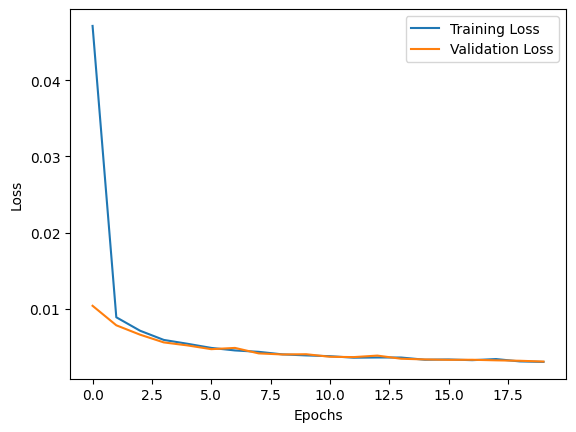

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


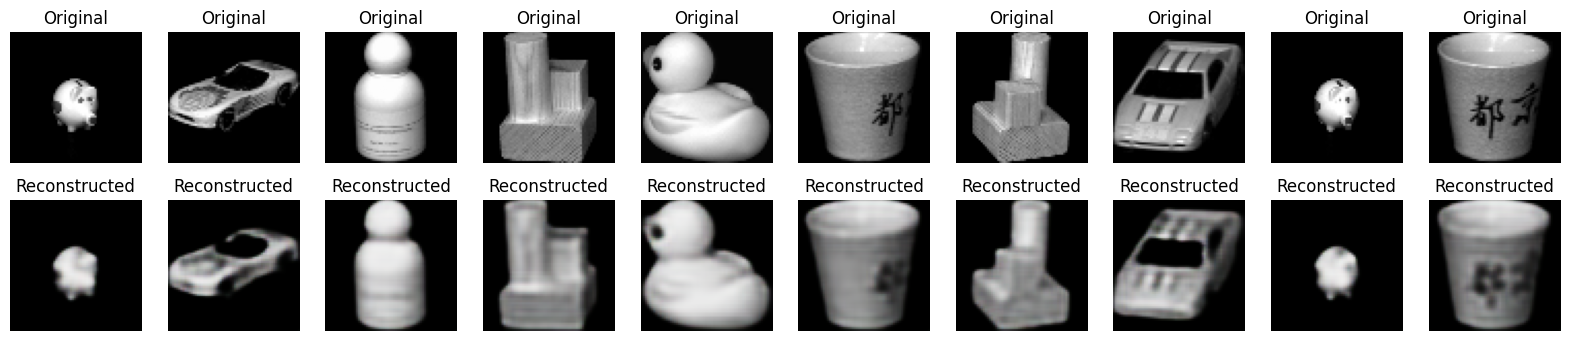

Final test MSE value: 0.003061434719711542


In [14]:
# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize reconstructions
decoded_imgs = autoencoder.predict(X_test[:10])

plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

#Final test MSE value.
mse_test = autoencoder.evaluate(X_test, X_test, verbose=0)
print(f"Final test MSE value: {mse_test}")


# Architecture of the CNN Autoencoder.

1.   **Encoder:**

*   **Input Layer:** Takes an image with the specified input_shape (e.g., 64x64x3).
*   **Conv2D Layer 1:** 32 filters, 3x3 kernel, ReLU activation, 'same' padding.
   Reduces the image dimensions slightly while extracting features.
*  **MaxPooling2D Layer 1:** 2x2 pooling, 'same' padding. Downsamples the feature maps by half.
* **Conv2D Layer 2:** 64 filters, 3x3 kernel, ReLU activation, 'same' padding. Extracts more complex features.
*  **MaxPooling2D Layer 2:** 2x2 pooling, 'same' padding. Further downsampling.The output of the encoder (encoded) is a lower-dimensional representation of the input image — the latent space.


2.  **Decoder:**

* **Conv2DTranspose Layer 1:** 64 filters, 3x3 kernel, ReLU activation, 'same' padding. Upsamples the latent representation while learning to reconstruct features.
*  **UpSampling2D Layer 1:** Upsamples the feature maps by a factor of 2.
* **Conv2DTranspose Layer 2:** 32 filters, 3x3 kernel, ReLU activation, 'same' padding. Further reconstruction of features.
* **UpSampling2D Layer 2:** Upsamples the feature maps by a factor of 2.
* **Conv2D Layer 3:** 3 filters (matching the input image channels), sigmoid activation, 'same' padding.  Produces the final reconstructed image. The sigmoid activation ensures the output pixel values are between 0 and 1.

The encoder progressively reduces the spatial dimensions of the image using convolutional and max-pooling layers, creating a compact latent representation.  The decoder reverses this process using transposed convolutions and upsampling to reconstruct the input image from the encoded representation.

